<img src="https://miro.medium.com/max/800/0*elSDSNS2zO3owO9f.jpeg" />

# Email Spam Detection

### Introduction to Email Spam Detection using Natural Language Processing
Email spam, also known as unsolicited or unwanted email, has become a pervasive problem in today's digital world. Spam emails not only clutter our inboxes but also pose security risks and waste valuable time. Natural Language Processing (NLP) techniques can be applied to effectively detect and filter out spam emails, improving email communication and user experience.

In this project, we will explore the use of NLP for email spam detection. NLP is a subfield of artificial intelligence that focuses on understanding and processing human language. By leveraging NLP techniques, we can analyze the textual content of emails and extract meaningful features to identify patterns that distinguish spam emails from legitimate ones.

By utilizing NLP techniques for email spam detection, we can effectively identify and filter out unwanted emails, reducing the risk of falling victim to scams, phishing attacks, and other malicious activities. This project can be applied to personal email accounts, corporate email servers, or email service providers, enhancing email security and user experience.

It's important to note that email spam detection is an ongoing challenge due to the evolving nature of spamming techniques. Regular updates and improvements to the spam detection model are necessary to adapt to new spamming strategies and ensure continued effectiveness in detecting and filtering out spam emails.

### Step1: Load the data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px

In [2]:
df = pd.read_csv("spam.csv",encoding = "ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Step 2: Explanatory Data Analysis(EDA)

In [3]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis='columns',inplace=True)
df.shape,df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


((5572, 2), None)

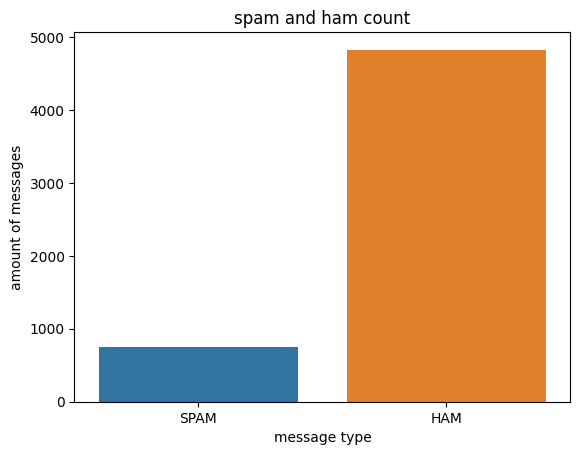

In [4]:
msg_cnts = [df[df['v1']=='spam'].shape[0],df[df['v1']=='ham'].shape[0]]
x_label=['SPAM','HAM']
sns.barplot(x=x_label, y=msg_cnts)
plt.title("spam and ham count")
plt.xlabel("message type")
plt.ylabel("amount of messages")
plt.show()

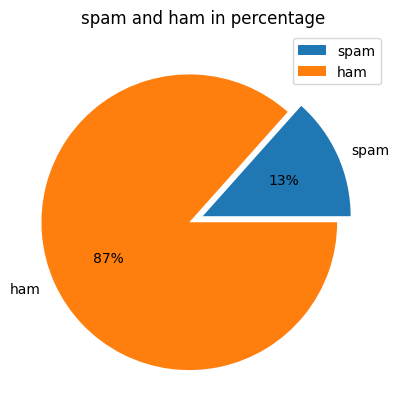

In [5]:
labels = ["spam","ham"]
plt.pie(x=msg_cnts,explode = [0,0.1],labels=labels,autopct='%.0f%%')
plt.title("spam and ham in percentage")
plt.legend()
plt.show()


### Step 3: Extract, Transforma and Load (ETL) Process

In [7]:
def unlabeler(lis):
    temp = []
    for dp in lis:
        if dp == 0:
            temp.append('ham')
        else:
            temp.append('spam')
    return temp

new1 = pd.read_csv("spam_ham_dataset.csv")
new1_df = new1[new1['label']=='spam']
new2 = pd.read_csv("spam_or_not_spam.csv")
new2_df = new2[new2['label']==1]

# first dataframe
new_df = new1_df.drop(["Unnamed: 0",'label_num'],axis='columns')
new_df.columns = df.columns

# second dataframe
new2_df['v1'] = unlabeler(new2_df['label'])
new2_df['v2'] = new2['email']
new2_df = new2_df.drop(['email','label'],axis='columns')
new2_df.head()

C:\Users\panch\AppData\Local\Temp\ipykernel_12712\2849830190.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new2_df['v1'] = unlabeler(new2_df['label'])
C:\Users\panch\AppData\Local\Temp\ipykernel_12712\2849830190.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new2_df['v2'] = new2['email']


,v1,v2
2500,spam,save up to NUMBER on life insurance why spend...
2501,spam,NUMBER fight the risk of cancer URL NUMBER sli...
2502,spam,NUMBER fight the risk of cancer URL NUMBER sli...
2503,spam,adult club offers free membership instant acc...
2504,spam,i thought you might like these NUMBER slim dow...


In [8]:
new_df.head()

,v1,v2
3,spam,"Subject: photoshop , windows , office . cheap ..."
7,spam,Subject: looking for medication ? we ` re the ...
10,spam,Subject: vocable % rnd - word asceticism\r\nvc...
11,spam,Subject: report 01405 !\r\nwffur attion brom e...
13,spam,Subject: vic . odin n ^ ow\r\nberne hotbox car...


In [9]:
balanced_df = pd.concat([df,new_df,new2_df],axis='rows')
balanced_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df = balanced_df.copy()
df.isnull().sum(),df.shape

(v1    0
 v2    1
 dtype: int64,
 (7571, 2))

In [11]:
df.dropna(inplace=True)

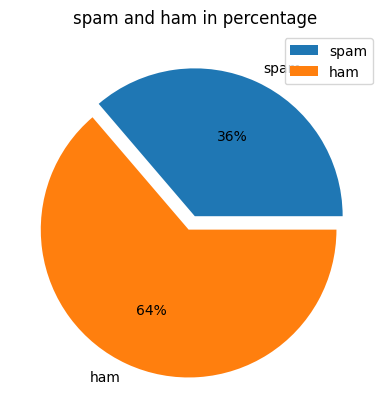

In [12]:
msg_cnts = [df[df['v1']=='spam'].shape[0],df[df['v1']=='ham'].shape[0]]
labels = ["spam","ham"]
plt.pie(x=msg_cnts,explode = [0,0.1],labels=labels,autopct='%.0f%%')
plt.title("spam and ham in percentage")
plt.legend()
plt.show()

### Step 4: Model Training

In [13]:
import nltk
import re
from urllib.parse import urlparse
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')

In [14]:
nltk.download('omw-1.4') # Open Multilingual Wordnet, this is an lexical database 
nltk.download('wordnet') 
nltk.download('wordnet2022')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\panch\AppData\Roaming\nltk_data...
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\panch\AppData\Roaming\nltk_data...
[nltk_data] Downloading package wordnet2022 to
[nltk_data]     C:\Users\panch\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet2022.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\panch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\panch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
lemmatizer = WordNetLemmatizer()
stop_words = list(stopwords.words('english'))
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
def textPocess(sms):
    try:
        # brackets replacing by space
        sms = re.sub('[][)(]',' ',sms)

        # url removing
        sms = [word for word in sms.split() if not urlparse(word).scheme]
        sms = ' '.join(sms)

        # removing words starts from @
        sms = re.sub(r'\@\w+','',sms)

        # removing html tags 
        sms = re.sub(re.compile("<.*?>"),'',sms)
        
        # getting only characters and numbers
        sms = re.sub('[^A-Za-z0-9]',' ',sms)
        
        # make all words into lowercase
        sms = sms.lower()
        
        # word tokennization 
        tokens = word_tokenize(sms,language='english')
        
        # removing whitespaces
        sms = [word.strip() for word in tokens]
        
        # removing word and number combinations or numbers
#         sms = [word for word in sms if not re.search('\d.',word)]
        
        # stopwords removing
        sms = [word for word in sms if word not in stop_words]
        
        # lemmatization
        sms = [lemmatizer.lemmatize(word) for word in sms]
        sms = ' '.join(sms)
        
        return sms
    except Exception as e:
        print("sms",sms)
        print("Error",e)
        return 0

In [17]:
df['processed'] = df['v2'].apply(lambda sms: textPocess(sms))

In [18]:
encoder = LabelEncoder()
df['encoded'] = encoder.fit_transform(df['v1'])
df.head()

,v1,v2,processed,encoded
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,1
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though,0


In [19]:
from wordcloud import WordCloud
spam_df = df[df['v1']=='spam']
ham_df = df[df['v1']=='ham']

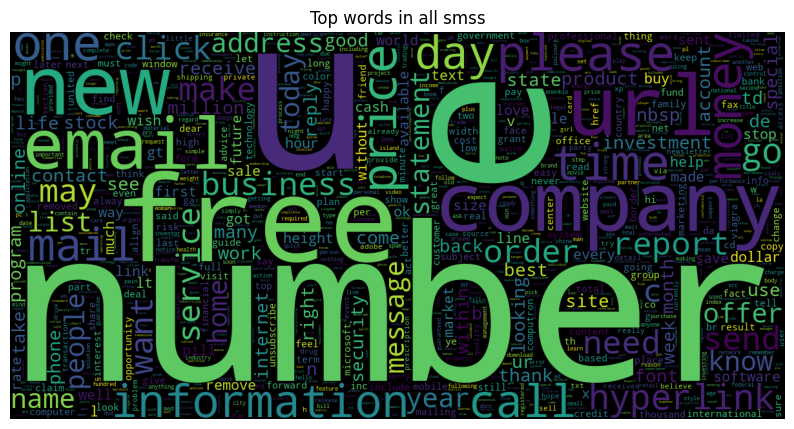

In [20]:
wc = WordCloud(background_color = "black", width = 1200, height = 600,
               contour_width = 0, contour_color = "#410F01", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)

text_data = [data for data in df['processed']]
text_data = ' '.join(text_data)
wc.generate(text_data)
plt.figure(figsize=[10,7])
plt.title("Top words in all smss")
plt.imshow(wc)
plt.axis('off')
plt.show()

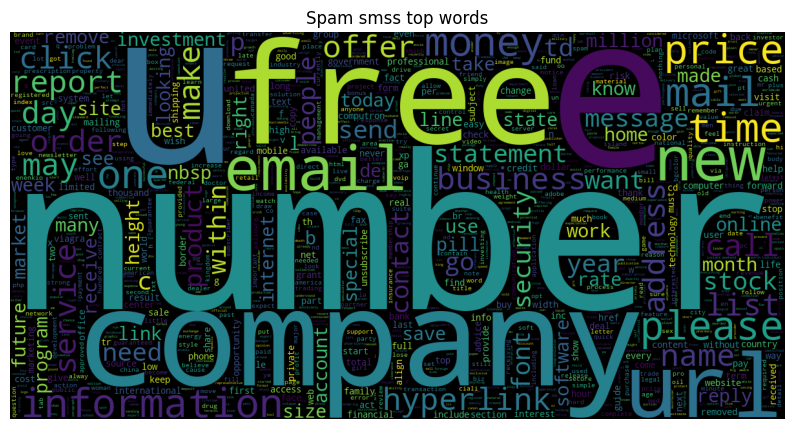

In [21]:
text_data = [data for data in spam_df['processed']]
text_data = ' '.join(text_data)
wc.generate(text_data)
plt.figure(figsize=[10,7])
plt.title("Spam smss top words")
plt.imshow(wc)
plt.axis('off')
plt.show()

In [22]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split,cross_val_score
MIN_DF = 10

In [23]:
bow_vec = CountVectorizer(min_df=MIN_DF)
bow_vec_class = bow_vec.fit_transform(df['processed'])
bow_vec_arr = bow_vec_class.toarray()
bow_df = pd.DataFrame(bow_vec_arr,columns=bow_vec.get_feature_names_out())
bow_df.head()

,00,000,01,02,0200,03,04,05,0500,06,...,yup,zealand,zenith,zero,zimbabwe,zip,zone,zonedubai,zyban,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
tf_vec = TfidfVectorizer(min_df=MIN_DF)
tf_vec_class = tf_vec.fit_transform(df['processed'])
tf_vec_arr = tf_vec_class.toarray()
tf_df = pd.DataFrame(tf_vec_arr,columns=tf_vec.get_feature_names_out())
tf_df.head()

,00,000,01,02,0200,03,04,05,0500,06,...,yup,zealand,zenith,zero,zimbabwe,zip,zone,zonedubai,zyban,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
tf_df.shape,bow_df.shape,df.shape

((7570, 3475), (7570, 3475), (7570, 4))

In [26]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

In [27]:
X_train_b,X_test_b,y_train_b,y_test_b = train_test_split(bow_df,df['encoded'],stratify=df['encoded'])
X_train_t,X_test_t,y_train_t,y_test_t = train_test_split(tf_df,df['encoded'],stratify=df['encoded'])
print("X_train_b.shape,y_test_b.shape",X_train_b.shape,y_test_b.shape)
print("X_train_t.shape,y_test_t.shape",X_train_t.shape,y_test_t.shape)

X_train_b.shape,y_test_b.shape (5677, 3475) (1893,)
X_train_t.shape,y_test_t.shape (5677, 3475) (1893,)


In [28]:
model_nb_ber = BernoulliNB()
model_nb_ber.fit(X_train_b,y_train_b)
model_nb_ber.score(X_test_b,y_test_b)

0.8526148969889065

In [29]:
model_nb_ber = BernoulliNB()
model_nb_ber.fit(X_train_t,y_train_t)
model_nb_ber.score(X_test_t,y_test_t)

0.8568409931325938

In [30]:
bag_cv_score = cross_val_score(BernoulliNB(),bow_df,df['encoded'])
tf_cv_score = cross_val_score(BernoulliNB(),tf_df,df['encoded'])
print("score for BOW",bag_cv_score,"average",sum(bag_cv_score)/len(bag_cv_score))
print("score for tf-idf",tf_cv_score,"average",sum(tf_cv_score)/len(tf_cv_score))

score for BOW [0.64332893 0.81902246 0.89233818 0.90951123 0.95046235] average 0.8429326287978863
score for tf-idf [0.64332893 0.81902246 0.89233818 0.90951123 0.95046235] average 0.8429326287978863


In [31]:
model_nb_ber = LogisticRegression()
model_nb_ber.fit(X_train_b,y_train_b)
model_nb_ber.score(X_test_b,y_test_b)

0.9524564183835182

In [32]:
bag_cv_score = cross_val_score(LogisticRegression(),bow_df,df['encoded'])
tf_cv_score = cross_val_score(LogisticRegression(),tf_df,df['encoded'])
print("score for BOW",bag_cv_score,"average",sum(bag_cv_score)/len(bag_cv_score))
print("score for tf-idf",tf_cv_score,"average",sum(tf_cv_score)/len(tf_cv_score))

score for BOW [0.93923382 0.93989432 0.94319683 0.94583884 0.97357992] average 0.9483487450462352
score for tf-idf [0.89630119 0.92932629 0.91545575 0.92073976 0.94451783] average 0.9212681638044915


In [33]:
model_nb_ber = LogisticRegression()
model_nb_ber.fit(X_train_t,y_train_t)
model_nb_ber.score(X_test_t,y_test_t)

0.9471737982039091

In [34]:
# final training model
model = LogisticRegression()
model.fit(tf_df,df['encoded'])

LogisticRegression()

In [35]:
def textProcess(sms):
    try:
        # brackets replacing by space
        sms = re.sub('[][)(]',' ',sms)

        # url removing
        sms = [word for word in sms.split() if not urlparse(word).scheme]
        sms = ' '.join(sms)

        # removing words starts from @
        sms = re.sub(r'\@\w+','',sms)

        # removing html tags 
        sms = re.sub(re.compile("<.*?>"),'',sms)
        
        # getting only characters and numbers
        sms = re.sub('[^A-Za-z0-9]',' ',sms)
        
        # make all words into lowercase
        sms = sms.lower()
        
        # word tokennization 
        tokens = word_tokenize(sms,language='english')
        
        # removing whitespaces
        sms = [word.strip() for word in tokens]
        
#         # removing word and number combinations or numbers
#         sms = [word for word in sms if not re.search('\d.',word)]
        
        # stopwords removing
        sms = [word for word in sms if word not in stop_words]
        
        # lemmatization
        sms = [lemmatizer.lemmatize(word) for word in sms]
        sms = ' '.join(sms)
        
        return sms
    except Exception as e:
        print("sms",sms)
        print("Error",e)
        return 0
    
def manager(sms):
    sms = textProcess(sms)
    sms = tf_vec.transform([sms])
    result = model.predict(sms)
    return result

### Step 5: Model Evaluation

In [36]:
sms1 = """100% of daily 1.50 GB data quota exhausted as on 26-May-23 00:31. 
Jio Number : Daily high speed data quota will be restored on 26-May-23 01:04.
To know where you have consumed your data quota, click """

sms2 = """Hurry! Recharge Jio no.XXXXXXXXXX on PhonePe & get rewards upto Rs.500 
each on first 3 recharges for self & family. Recharge with Rs.239 plan .T&CA. 
Click https://phon.pe/jion1"""

sms3 = """Hi XXXXXXXXX,
Prize pool - Rs. 5,00,00,000 (5 Cr)
Rs. 8850* Bonus on Junglee Rummy.
Win Now - http://gmg.im/fZBPBl To Optout SMS JR to 56161"""

sms4 = """Hello Player,
SANDEEP Won Rs.8,16,000 on Howzat!
MI vs LSG is Live. 
Play and win from Rs.60 lakhs
Entry Fees - Rs.34
Click - http://gmg.im/fq9U93"""

sms5 = """1 day left! Participate in Coding Ninjas 100% Scholarship Test. 
Get up to 100% Scholarship on all courses. Register now weurl.co/4s7rMG
- Coding Ninjas"""

sms6 = """IDBI Bank A/c  credited for INR 92.00 thru UPI. 
Bal INR 1136.68 (incl. of chq in clg) as of 25 MAY 19:46hr. If not used by you, call """

sms7 = """Your a/c no. is debited for Rs.100.00 on 20-05-23 and credited to a/c no. 
(UPI Ref no ).To block UPI services of IDBI Bank, 
Send SMS as UPIBLOCK <type your mobile no> to  from your registered number, 
or call immediately.- IDBI BANK"""

sms8 = """IDBI Bank A/c NN13554 credited for INR 10.00 thru UPI. Bal INR 15649.68 
(incl. of chq in clg) as of 14 MAY 10:26hr. If not used by you, call """

sms9 = """Enter the word or phrase you want to replace in Find what. 
Enter your new text in Replace with. """

sms10 = """Dear Customer, +XXXXXXXX is now available to take calls."""
sms_lis = [sms1,sms2,sms3,sms4,sms5,sms6,sms7,sms8,sms9,sms10]

In [37]:
for i,sms in enumerate(sms_lis):
    res = manager(sms)
    print("sms "+str(i+1),res)

sms 1 [1]
sms 2 [1]
sms 3 [1]
sms 4 [1]
sms 5 [0]
sms 6 [0]
sms 7 [1]
sms 8 [1]
sms 9 [1]
sms 10 [0]


# Conclusion:
In conclusion, email spam detection using Natural Language Processing (NLP) techniques is a valuable solution to combat the persistent problem of unsolicited and unwanted emails. By leveraging NLP algorithms and models, we can analyze the textual content of emails and identify patterns that distinguish spam emails from legitimate ones.

Through the various steps involved in the project, including data collection, text preprocessing, feature extraction, model training, evaluation, and optimization, we can build a robust spam detection system. The trained model can effectively classify incoming emails as spam or ham, providing users with a more secure and streamlined email experience.

Implementing NLP techniques for email spam detection offers several benefits. It helps to filter out unwanted and potentially harmful emails, reducing the risk of falling victim to scams, phishing attacks, and malware. It also enhances productivity by enabling users to focus on genuine and relevant messages, saving time and effort spent on manually filtering through spam.

However, it is important to note that no spam detection system can be 100% accurate, as spammers constantly adapt their tactics. False positives (legitimate emails classified as spam) and false negatives (spam emails classified as legitimate) may occur. Therefore, ongoing monitoring and feedback from users are essential to continuously improve the spam detection system.